# Parsing data

In [3]:
from bs4 import BeautifulSoup
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import requests

In [4]:
# start = 1
# fin = 100
mindate = 1950
maxdate = 2018
term = "(emotions)%20AND%20skin%20conductance"
count_url = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&retmode=xml&&term=%s&mindate=%s&maxdate=%s'%(term, mindate, maxdate)
responses = requests.get(count_url)
count_soup = BeautifulSoup(responses.content, "lxml-xml")
counts = count_soup.findAll('Count')[0].contents[0]
print(counts)

url = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&retmode=xml&retmax=%s&term=%s&mindate=%s&maxdate=%s'%(counts, term, mindate, maxdate)
responses = requests.get(url)
soup = BeautifulSoup(responses.content, "lxml-xml")

id_list = []

for i in soup.findAll('Id'):
    id_list.append(i.contents[0])
    
print("Finished Add ID lists")

1380
Finished Add ID lists


# Assignment 1
### The top 10 journals that published papers on this topic ==> Title
### The top 10 authors ==> LastName, ForeName
### A histogram of the number of papers published with 5-year intervals ==> years
### The top 10 terms that appear in the
####    a. Title of the paper
####    b. Abstract of the paper

In [119]:
zen = "hello my world, we are one. hello my child, you are my world"
tokenizer = RegexpTokenizer(r'\w+')
zen_no_punc = tokenizer.tokenize(zen)
for i in (w.title() for w in zen_no_punc if w.lower() not in stopwords.words()):
    print(i)

Hello
World
One
Hello
Child
World


# Author, Year, Journal, Title, Abstract

In [5]:
test = [1,2,3,4]
print(len(test))
name_list = []
name = ""
error_url = []


# author count setting
author = defaultdict(lambda: 0)
year_count = defaultdict(lambda: 0)
journal_count = defaultdict(lambda: 0)
title_term = defaultdict(lambda: 0)
abstract_term = defaultdict(lambda: 0)

tokenizer = RegexpTokenizer(r'\w+')

here = 0

for i in range(len(id_list)):#real -> range(len(id_list)) || test -> test
    here += 1
    
    url_detail = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=%d'%(int(id_list[i]))
    print("%d: %s"%(here, url_detail))
    
    try:
        detail_responses = requests.get(url_detail)
        detail_soup = BeautifulSoup(detail_responses.content, 'lxml-xml')
    except:
        error_url.append(url_detail)
    
    try:
        a = detail_soup.findAll(['LastName','ForeName'])
        for i, j in enumerate(a):
            if i%2 == 0:
                name += j.contents[0]
            else:
                name += " " + j.contents[0]
                author[name] += 1
                name = ""
    except:
        pass
#     print(a)
#     print(detail_soup.Title.string)
#     print(detail_soup.Year.string)
    try:
        zen = detail_soup.ArticleTitle.string
        zen_no_punc = tokenizer.tokenize(zen)
        for i in (w.title() for w in zen_no_punc if w.lower() not in stopwords.words()):
            title_term[i] += 1
    except:
        pass
    
    try:
        zen = detail_soup.AbstractText.string
        zen_no_punc = tokenizer.tokenize(zen)
        for i in (w.title() for w in zen_no_punc if w.lower() not in stopwords.words()):
            abstract_term[i] += 1
    except:
        pass
    
    try:
        journal_count[detail_soup.Title.string] += 1
    except:
        pass
    
    try:
        year_count[detail_soup.Year.string] += 1
    except:
        pass
    
print("Finished!")
# print(author)
# print(journal_count)
# print(year_count)
# print(title_term)
# print(abstract_term)

4
1: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=29500922
2: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=29484262
3: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=29473143
4: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=29411386
5: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=29338020
6: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=29225563
7: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=29154585
8: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=29107798
9: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=29089874
10: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=29074970
11: https://eutils.ncbi.nlm.nih.gov/e

86: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=27690508
87: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=27684607
88: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=27655965
89: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=27628268
90: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=27560361
91: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=27554505
92: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=27544848
93: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=27537364
94: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=27509848
95: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=27503819
96: https://eutils.ncbi.nlm.ni

170: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=26630053
171: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=26621326
172: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=26602036
173: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=26600469
174: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=26578164
175: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=26572649
176: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=26562298
177: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=26547015
178: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=26536073
179: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=26530627
180: https://eutils.

254: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=25757651
255: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=25749431
256: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=25720947
257: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=25716297
258: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=25713544
259: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=25711689
260: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=25710916
261: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=25710735
262: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=25681735
263: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=25680674
264: https://eutils.

338: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=24841740
339: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=24827934
340: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=24814935
341: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=24813546
342: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=24798047
343: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=24746058
344: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=24730383
345: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=24727342
346: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=24719221
347: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=24714107
348: https://eutils.

422: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=23840683
423: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=23833867
424: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=23792215
425: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=23790683
426: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=23776033
427: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=23768127
428: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=23740049
429: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=23731074
430: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=23731073
431: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=23713509
432: https://eutils.

506: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=22570325
507: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=22560888
508: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=22560057
509: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=22538209
510: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=22520825
511: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=22516273
512: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=22515678
513: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=22514684
514: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=22509251
515: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=22506603
516: https://eutils.

590: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=21898707
591: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=21893160
592: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=21879884
593: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=21868175
594: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=21859207
595: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=21843542
596: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=21839756
597: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=21826762
598: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=21821231
599: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=21790904
600: https://eutils.

674: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=20452189
675: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=20450413
676: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=20447616
677: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=20443722
678: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=20428514
679: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=20412837
680: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=20406268
681: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=20381628
682: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=20381160
683: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=20346390
684: https://eutils.

758: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=18997532
759: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=18996510
760: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=18986648
761: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=18954475
762: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=18947351
763: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=18938780
764: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=18929603
765: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=18845192
766: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=18832564
767: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=18827756
768: https://eutils.

842: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=17604559
843: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=17596178
844: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=17584187
845: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=17576260
846: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=17563202
847: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=17540222
848: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=17524956
849: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=17521808
850: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=17518915
851: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=17516815
852: https://eutils.

926: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=16511831
927: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=16500774
928: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=16489438
929: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=16435966
930: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=16433732
931: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=16427713
932: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=16426691
933: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=16403585
934: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=16403424
935: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=16398603
936: https://eutils.

1010: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=15297895
1011: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=15294392
1012: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=15262221
1013: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=15238993
1014: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=15210291
1015: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=15210287
1016: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=15200635
1017: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=15189474
1018: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=15159538
1019: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=15157813
1020: http

1093: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=11801299
1094: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=11784838
1095: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=11762425
1096: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=11728612
1097: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=11698114
1098: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=11697938
1099: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=11666043
1100: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=11577904
1101: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=11564447
1102: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=11520010
1103: http

1176: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=9270369
1177: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=9328502
1178: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=9175448
1179: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=9132703
1180: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=9021649
1181: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=9305414
1182: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=8961788
1183: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=8952185
1184: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=8917161
1185: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=8912406
1186: https://eutils

1260: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=2021381
1261: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=2012588
1262: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=2011954
1263: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=1920181
1264: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=1886966
1265: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=1876667
1266: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=1876666
1267: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=1759959
1268: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=1759955
1269: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=1685608
1270: https://eutils

1344: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=7435313
1345: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=7351542
1346: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=490311
1347: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=451493
1348: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=422733
1349: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=687529
1350: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=650384
1351: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=864589
1352: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=871179
1353: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?&db=pubmed&retmode=xml&id=833332
1354: https://eutils.ncbi.nl

## Top 10 Author

In [16]:
s_author = [(k,author[k]) for k in sorted(author, key=author.get, reverse=True)]
top = 0
for k, v in s_author:
    top += 1
    print(k,v)
    if(top == 10):
        break
     

Orr Scott P 30
Milad Mohammed R 30
Pitman Roger K 20
Rhudy Jamie L 15
Kindt Merel 15
Flor Herta 14
Pauli Paul 14
Phelps Elizabeth A 14
Stark Rudolf 13
Merz Christian J 13


## Top 10 Journal

In [18]:
s_journal = [(k,journal_count[k]) for k in sorted(journal_count, key=journal_count.get, reverse=True)]
top = 0
for k, v in s_journal:
    top += 1
    print(k,v)
    if(top == 10):
        break
     

International journal of psychophysiology : official journal of the International Organization of Psychophysiology 88
Psychophysiology 86
Biological psychology 76
PloS one 48
Behaviour research and therapy 44
Biological psychiatry 31
Emotion (Washington, D.C.) 30
Psychiatry research 23
Psychopharmacology 22
Journal of behavior therapy and experimental psychiatry 22


# Top 10 terms (title, abstarct)

In [19]:
s_title_term = [(k,title_term[k]) for k in sorted(title_term, key=title_term.get, reverse=True)]
top = 0
for k, v in s_title_term:
    top += 1
    print(k,v)
    if(top == 10):
        break
     

Fear 344
Responses 213
Emotional 199
Anxiety 150
Effects 143
Conditioning 135
Physiological 124
Skin 124
Conductance 118
Autonomic 117


In [20]:
s_abstract_term = [(k,abstract_term[k]) for k in sorted(abstract_term, key=abstract_term.get, reverse=True)]
top = 0
for k, v in s_abstract_term:
    top += 1
    print(k,v)
    if(top == 10):
        break
     

Fear 1694
Skin 1536
Conductance 1479
Responses 1365
Emotional 1157
Anxiety 948
Response 918
Study 815
Extinction 776
Participants 766


# 5-years interval histogram

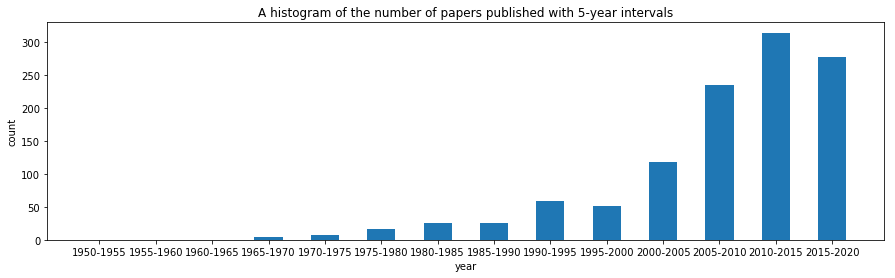

In [60]:
import matplotlib.pyplot as plt
import collections
# 5-years interval
f_year = collections.OrderedDict()# dict는 삽입 순서가 랜덤이기 때문에
start = 1950
count = 0
for i in range(1950, 2021):
#     print(i, year_count[str(i)])
    if(i % 5 == 0) and (i != 1950):
#         print(i)
        end = i
        f_year[str(start)+"-"+str(end)] = count
        count = 0
        start = i
    else:
        count += year_count[str(i)]
        
# print(f_year)
x = []
y = []
for k,v in f_year.items():
    x.append(k)
    y.append(v)
    
# print(x)
# print(y)
test = [i for i in range(len(y))]
plt.figure(figsize=(15, 4))

plt.bar(test, y, align='center', width= 0.5)
plt.title("A histogram of the number of papers published with 5-year intervals")
plt.xlabel("year")
plt.xticks(test, x)
plt.ylabel("count")
plt.show()